In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
df = pd.read_csv('zomato/zomato.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


This dataset contains information about various restaurants listed on Zomato, including their type, ratings, number of reviews, cost for two people, availability of online orders, table booking, cuisine type, and location. The data can be used for exploratory data analysis (EDA), trend analysis, and predictive modeling to gain insights into restaurant popularity, pricing strategies, and customer preferences.

Column Descriptions:

restaurant_name – Name of the restaurant.

restaurant_type – The category of the restaurant (e.g., Quick Bites, Casual Dining, Takeaway).

rating – Customer rating out of 5.

num_ratings – The total number of user ratings for the restaurant.

avg_cost – Average cost for two people (in currency).

online_order – Whether the restaurant accepts online orders (Yes/No).

table_booking – Whether the restaurant allows table bookings (Yes/No).

cuisine_type – The type of cuisine served (e.g., Italian, Chinese, Fast Food).

area – The locality or area where the restaurant is located.

local_address – The exact address of the restaurant.

Insights We Can Obtain from the Analysis
By performing univariate and bivariate analysis, we can derive the following insights:

Popular Restaurant Types: Which category (e.g., Quick Bites, Casual Dining) has the highest number of restaurants?

Ratings Distribution: Understanding how ratings are distributed and identifying top-rated vs. low-rated restaurants.

Price vs. Rating Correlation: Analyzing whether expensive restaurants receive higher ratings.

Impact of Online Orders: Checking if restaurants that accept online orders have better ratings or more reviews.

Cuisine Trends by Area: Identifying which cuisines are popular in different areas.

Number of Reviews vs. Ratings: Whether a higher number of ratings leads to better average ratings.


# **Data Cleaning**

In [21]:
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [22]:
df = df.iloc[:, 2:]

df.columns = ['restaurant_name', 'restaurant_type', 'rating', 'num_ratings',
              'avg_cost', 'online_order', 'table_booking', 'cuisine_type', 'area', 'local_address']


df.dropna(inplace=True)



df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.dropna(subset=['rating'], inplace=True)

df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['table_booking'] = df['table_booking'].map({'Yes': 1, 'No': 0})

df['avg_cost'] = df['avg_cost'].astype(str).str.replace(',', '').astype(float)

df['restaurant_name'] = df['restaurant_name'].str.replace(r"[@#']", '', regex=True)

df['cuisine_type'] = df['cuisine_type'].str.split(',')

df.reset_index(drop=True, inplace=True)


df.to_csv('zomato_cleaned.csv', index=False)

In [23]:
df.head()

,restaurant_name,restaurant_type,rating,num_ratings,avg_cost,online_order,table_booking,cuisine_type,area,local_address
0,FeelTheROLL,Quick Bites,3.4,7,200.0,0,0,[Fast Food],Bellandur,Bellandur
1,L-81 Cafe,Quick Bites,3.9,48,400.0,1,0,"[Fast Food, Beverages]","Byresandra,Tavarekere,Madiwala",HSR
2,refuel,Cafe,3.7,37,400.0,1,0,"[Cafe, Beverages]",Bannerghatta Road,Bannerghatta Road
3,Biryani Central,Casual Dining,2.7,135,550.0,1,0,"[Biryani, Mughlai, Chinese]",Marathahalli,Marathahalli
4,The Bbq,Casual Dining,2.8,40,700.0,1,0,"[BBQ, Continental, North Indian, Chinese, ...",Bellandur,Bellandur


# Univariate Analysis

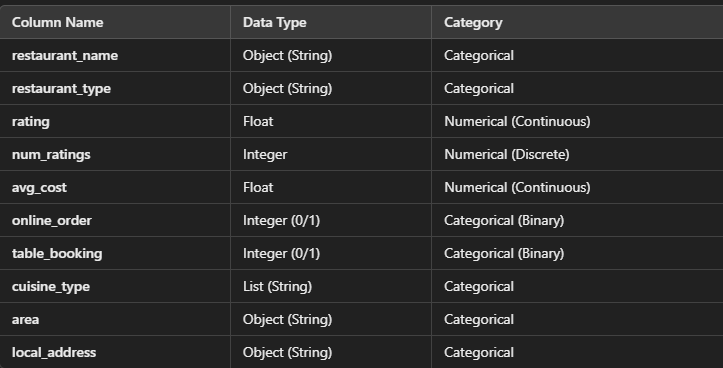

Numerical Columns

In [24]:
print(df[['rating', 'num_ratings', 'avg_cost']].describe())


            rating   num_ratings     avg_cost
count  6984.000000   6984.000000  6984.000000
mean      3.514304    190.928837   542.544244
std       0.463489    596.717894   464.266828
min       1.800000      1.000000    40.000000
25%       3.200000     15.000000   300.000000
50%       3.500000     40.000000   400.000000
75%       3.800000    130.000000   600.000000
max       4.900000  16345.000000  6000.000000


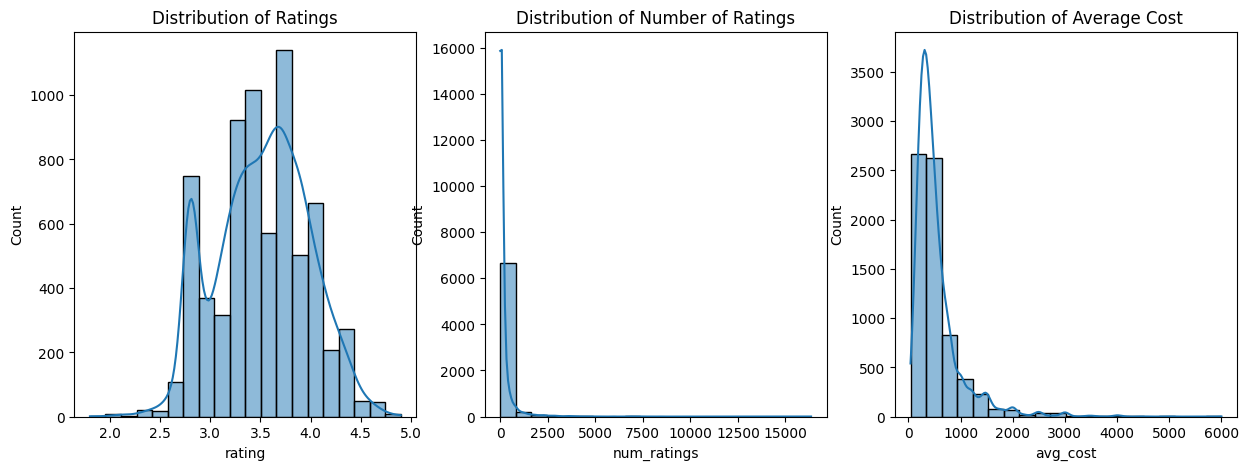

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')

plt.subplot(1, 3, 2)
sns.histplot(df['num_ratings'], bins=20, kde=True)
plt.title('Distribution of Number of Ratings')

plt.subplot(1, 3, 3)
sns.histplot(df['avg_cost'], bins=20, kde=True)
plt.title('Distribution of Average Cost')

plt.show()

Categorical columns

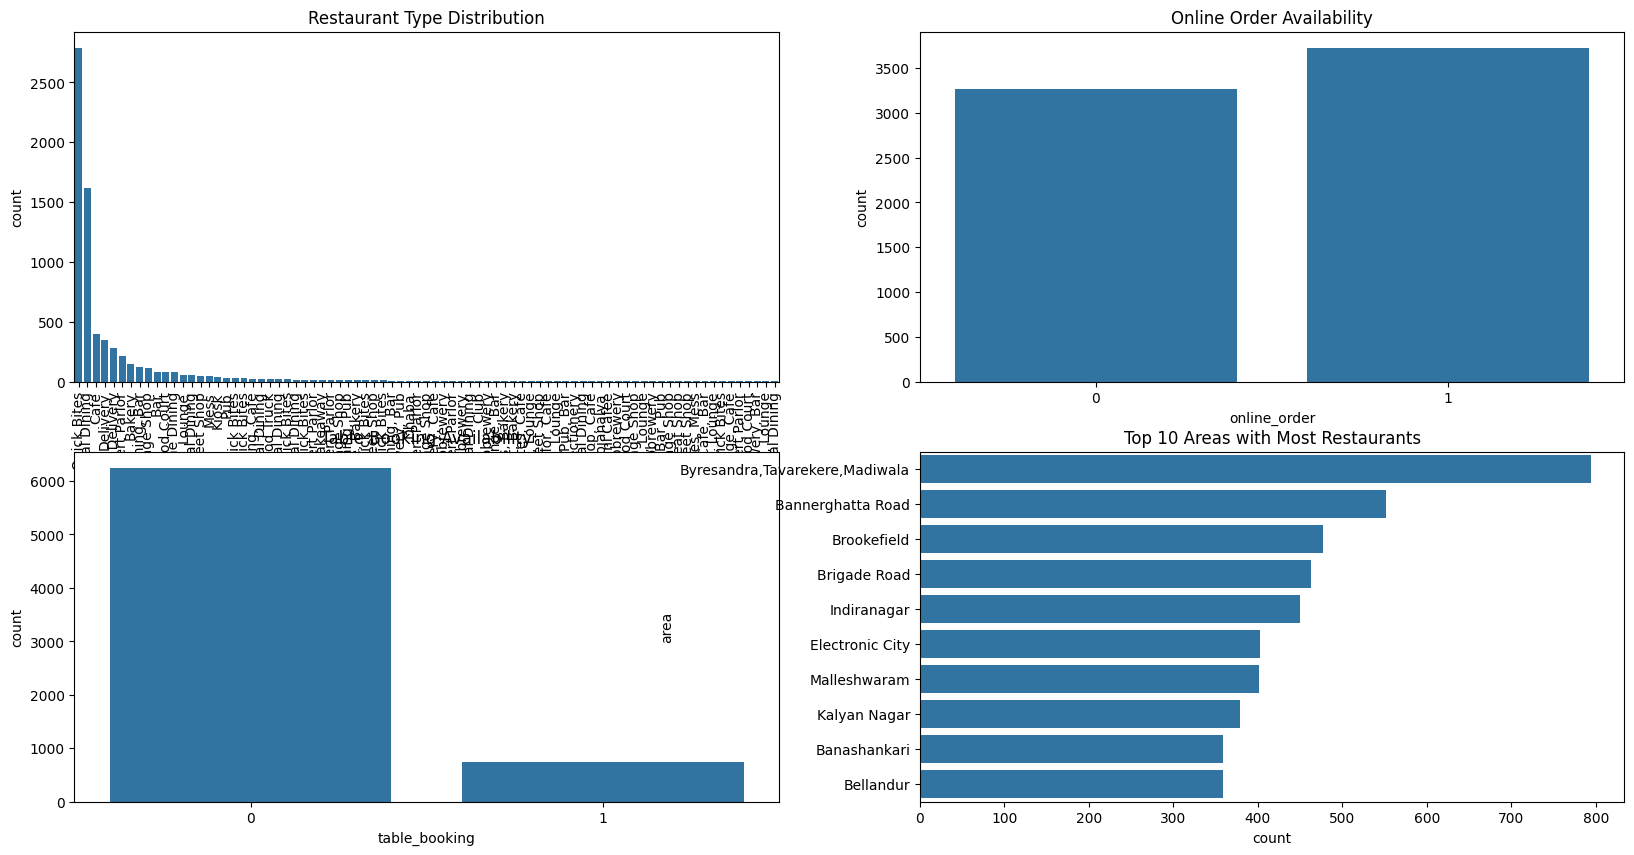

In [26]:

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='restaurant_type', data=df, order=df['restaurant_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Restaurant Type Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='online_order', data=df)
plt.title('Online Order Availability')

plt.subplot(2, 2, 3)
sns.countplot(x='table_booking', data=df)
plt.title('Table Booking Availability')

plt.subplot(2, 2, 4)
sns.countplot(y=df['area'], order=df['area'].value_counts().index[:10])  # Top 10 areas
plt.title('Top 10 Areas with Most Restaurants')

plt.show()


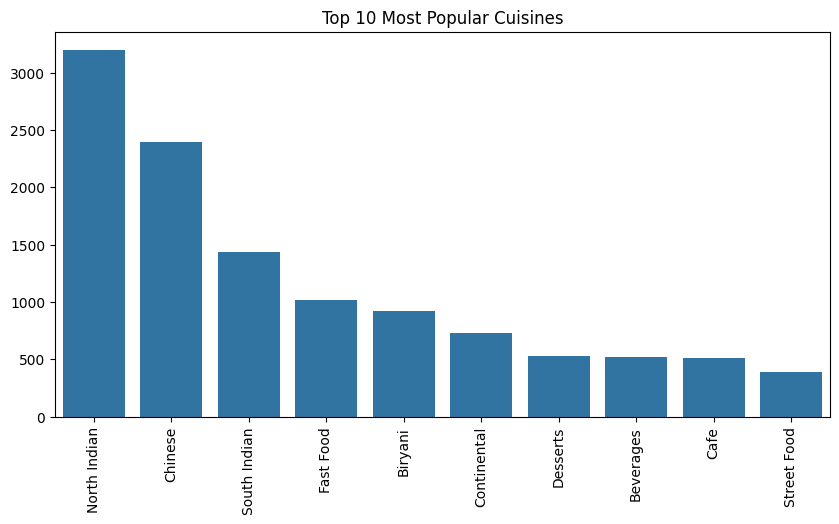

In [27]:
from collections import Counter

cuisine_counter = Counter([cuisine.strip() for sublist in df['cuisine_type'] for cuisine in sublist])
top_cuisines = dict(cuisine_counter.most_common(10))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_cuisines.keys()), y=list(top_cuisines.values()))
plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Cuisines')
plt.show()


# Bi variate Analysis

Scatter plots

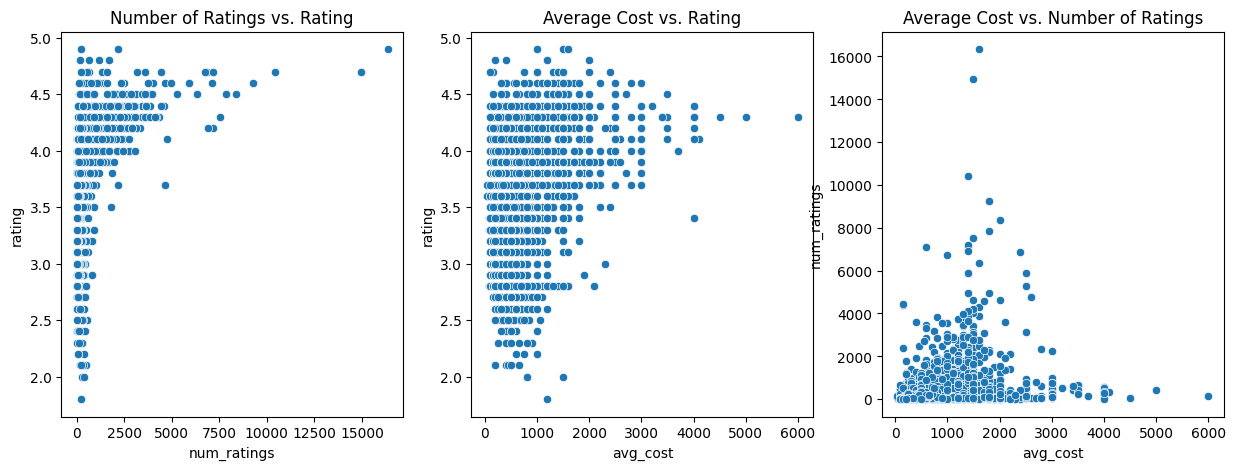

In [28]:
plt.figure(figsize=(15, 5))

# Ratings vs. Number of Ratings
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['num_ratings'], y=df['rating'])
plt.title('Number of Ratings vs. Rating')

# Ratings vs. Average Cost
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['avg_cost'], y=df['rating'])
plt.title('Average Cost vs. Rating')

# Number of Ratings vs. Average Cost
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['avg_cost'], y=df['num_ratings'])
plt.title('Average Cost vs. Number of Ratings')

plt.show()


Box plots

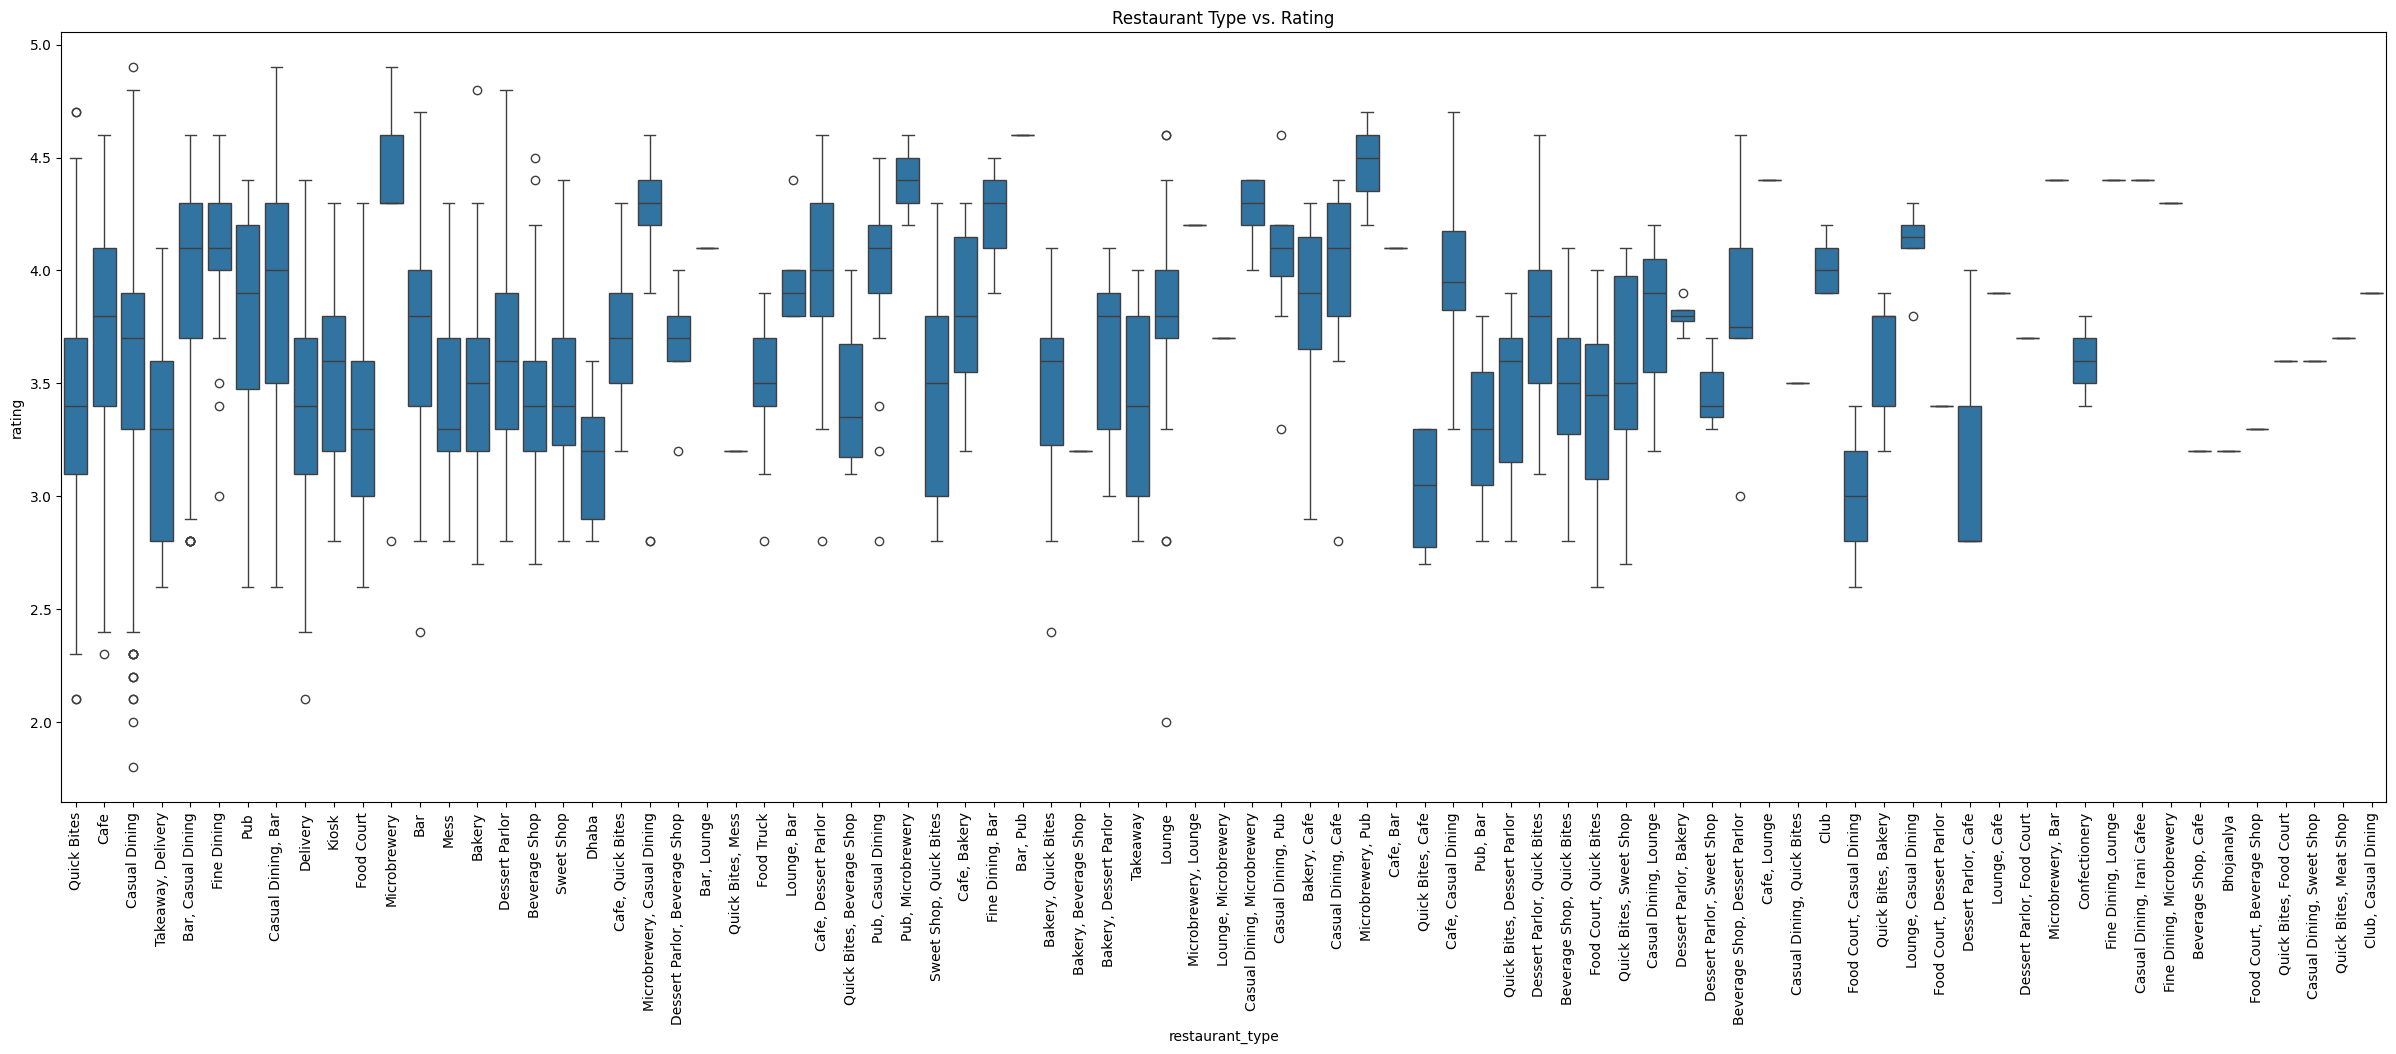

In [29]:
plt.figure(figsize=(30, 10))
sns.boxplot(x='restaurant_type', y='rating', data=df)
plt.xticks(rotation=90)
plt.title('Restaurant Type vs. Rating')
plt.show()

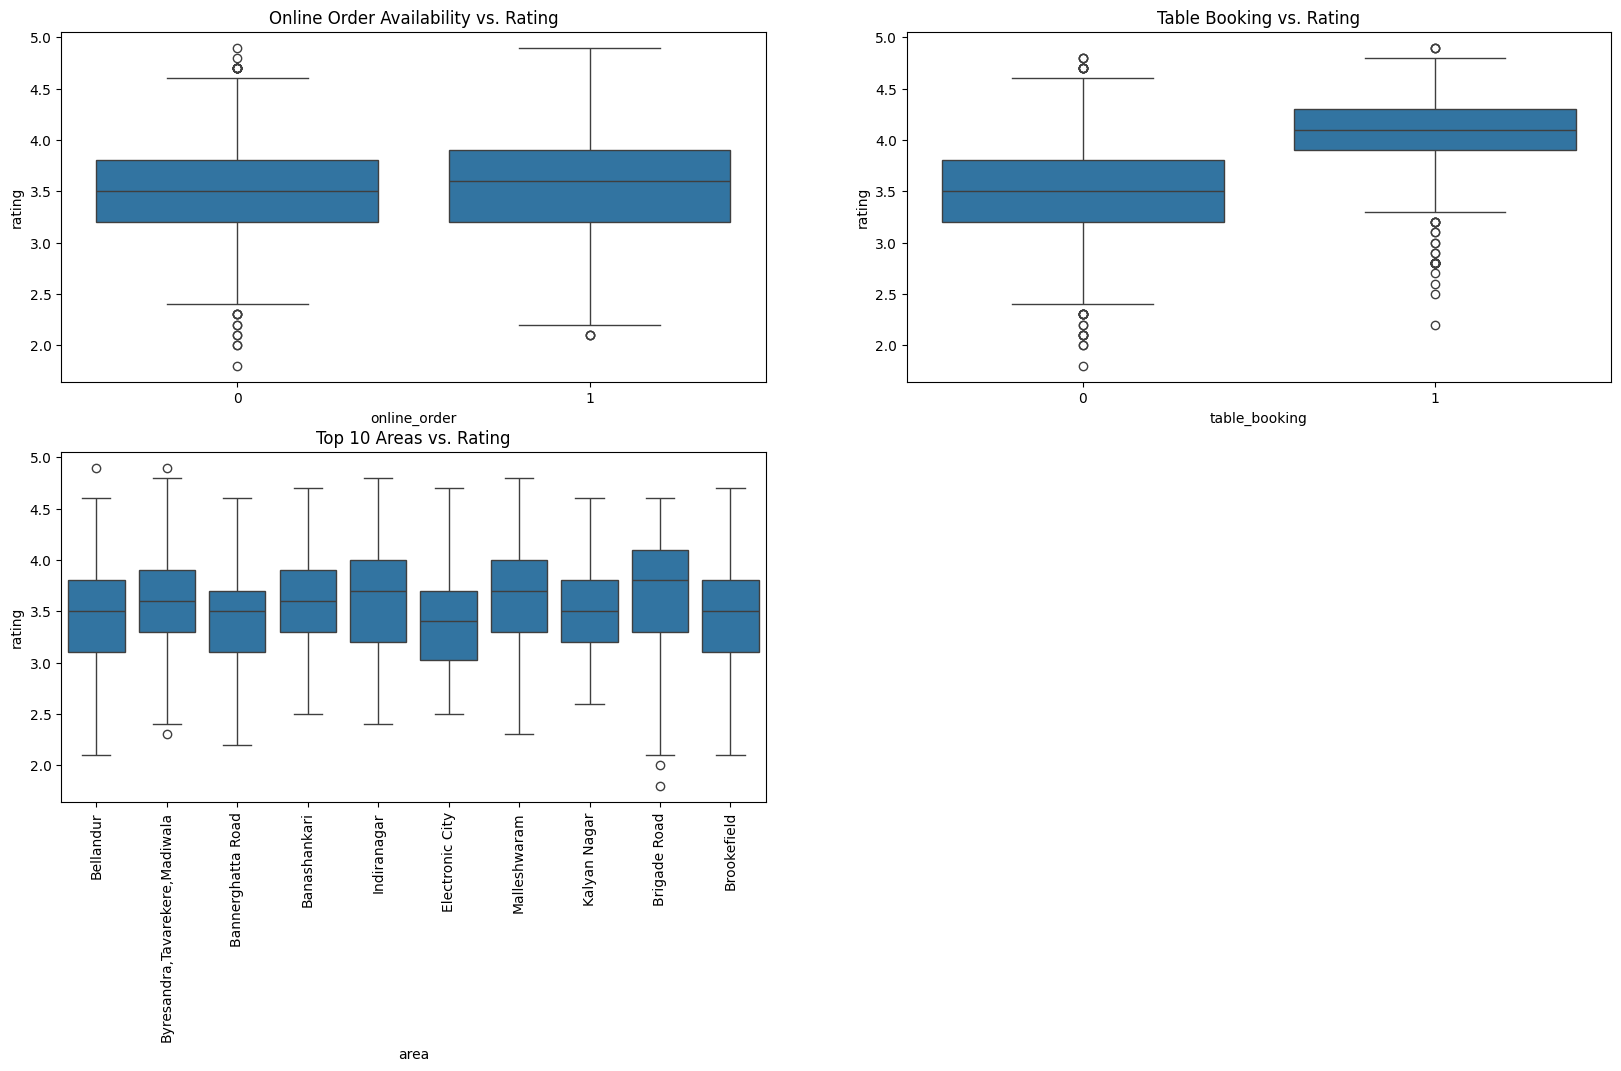

In [30]:
plt.figure(figsize=(20, 10))

# Online Order vs. Rating
plt.subplot(2, 2, 1)
sns.boxplot(x='online_order', y='rating', data=df)
plt.title('Online Order Availability vs. Rating')

# Table Booking vs. Rating
plt.subplot(2, 2, 2)
sns.boxplot(x='table_booking', y='rating', data=df)
plt.title('Table Booking vs. Rating')

# Area vs. Rating (Top 10)
top_areas = df['area'].value_counts().index[:10]
plt.subplot(2, 2, 3)
sns.boxplot(x='area', y='rating', data=df[df['area'].isin(top_areas)])
plt.xticks(rotation=90)
plt.title('Top 10 Areas vs. Rating')

plt.show()


HeatMaps

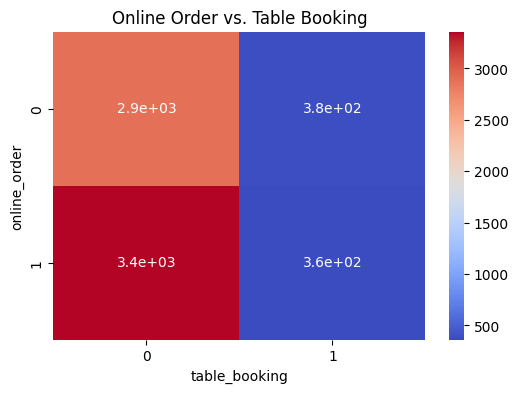

In [31]:
heatmap_data = df.pivot_table(index='online_order', columns='table_booking', aggfunc='size', fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Online Order vs. Table Booking')
plt.show()


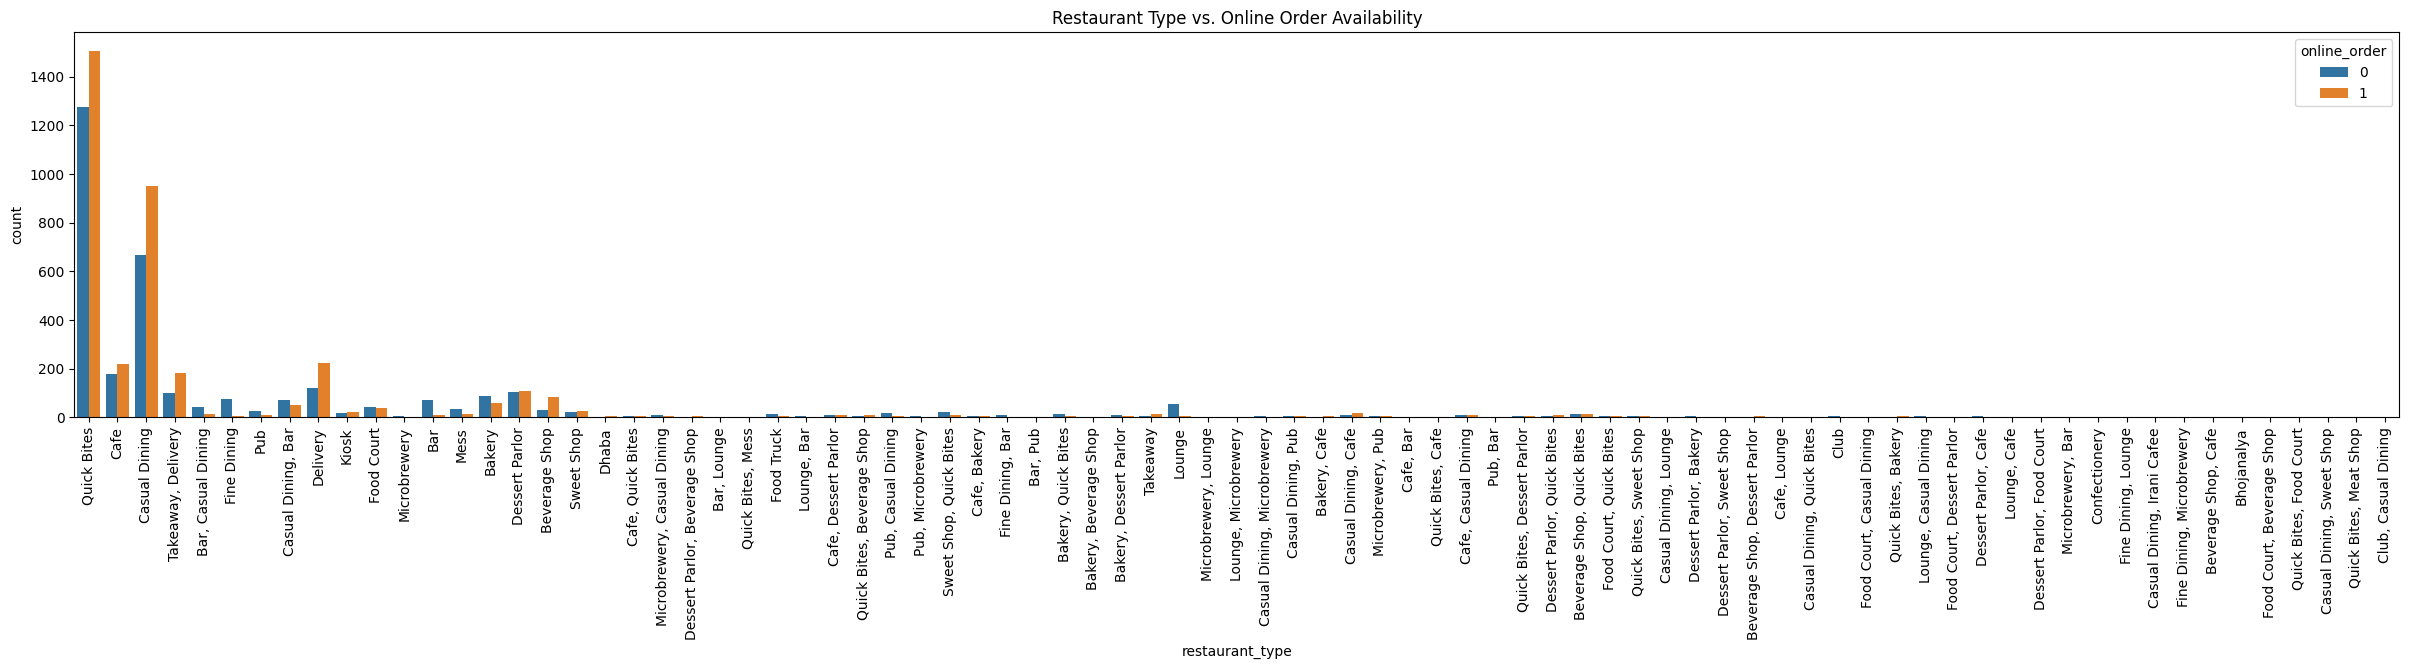

In [32]:

plt.figure(figsize=(30, 5))
sns.countplot(x='restaurant_type', hue='online_order', data=df)
plt.xticks(rotation=90)
plt.title('Restaurant Type vs. Online Order Availability')
plt.show()


Correlation matrix

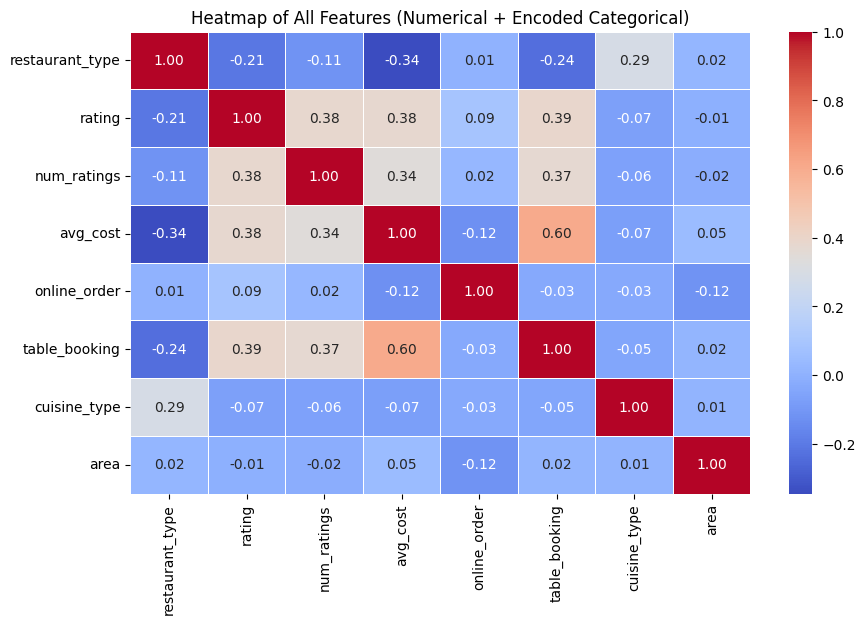

In [33]:

df_corr = df.copy()

df_corr.columns = df_corr.columns.str.strip()

for col in ['restaurant_type', 'online_order', 'table_booking', 'cuisine_type', 'area']:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].astype(str)


label_encoders = {}
categorical_cols = ['restaurant_type', 'online_order', 'table_booking', 'cuisine_type', 'area']

for col in categorical_cols:
    if col in df_corr.columns:
        le = LabelEncoder()
        df_corr[col] = le.fit_transform(df_corr[col])
        label_encoders[col] = le
    else:
        print(f"Warning: Column '{col}' not found!")

non_numeric_cols = ['restaurant_name', 'local_address']
df_corr = df_corr.drop(columns=[col for col in non_numeric_cols if col in df_corr.columns])

corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of All Features (Numerical + Encoded Categorical)")
plt.show()


The correlation matrix heatmap like the scatter plot, shows a strong positive correlation (close to 1) between table_booking and avg_cost (approximately 0.60).

Other correlations are relatively weak.

                                MSE  R-squared
Linear Regression          0.160861   0.225941
Ridge Regression           0.160856   0.225964
Lasso Regression           0.166209   0.200205
Decision Tree              0.203028   0.023033
Random Forest              0.106478   0.487630
Support Vector Regression  0.141377   0.319697
KNN                        0.146070   0.297114


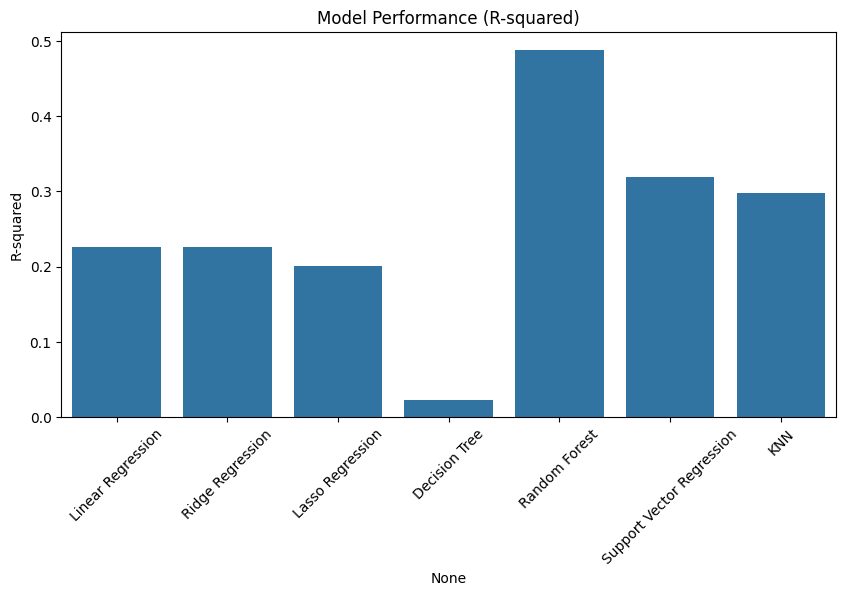

In [34]:

df_reg = df.copy()

df_reg = df_reg.dropna(subset=['rating'])

categorical_cols = ['restaurant_type', 'online_order', 'table_booking', 'cuisine_type', 'area']
for col in categorical_cols:
    if col in df_reg.columns:
        df_reg[col] = df_reg[col].astype(str)

label_encoders = {}
for col in categorical_cols:
    if col in df_reg.columns:
        le = LabelEncoder()
        df_reg[col] = le.fit_transform(df_reg[col])
        label_encoders[col] = le

df_reg = df_reg.drop(columns=['restaurant_name', 'local_address'], errors='ignore')

X = df_reg.drop('rating', axis=1)
y = df_reg['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "KNN": KNeighborsRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R-squared': r2}

results_df = pd.DataFrame(results).T
print(results_df)

plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df['R-squared'])
plt.xticks(rotation=45)
plt.title('Model Performance (R-squared)')
plt.show()
